<a href="https://colab.research.google.com/github/SahilMazumder27/US_Accidents_Exploratory_Data_Analysis/blob/main/US_Accident_Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis

TODO - talk about the EDA 
TODO - talk about the dataset(source,what it contains, how it will be useful)
- Kaggle
- Information about accidents
- Can be useful too prevent accidents
- Mention that this data does not contain data about New York

In [103]:
#install Kaggle
!pip install -q kaggle

In [104]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"sahilmazumdernits","key":"74635950078bd9769f8e7ec3c54fc957"}'}

In [105]:
#create a Kaggle folder
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [106]:
#copy the kaggle.json to the folder created
! cp kaggle.json ~/.kaggle/

In [107]:
#Permission for the json to act
! chmod 600~/.kaggle/kaggle.json

chmod: missing operand after ‘600~/.kaggle/kaggle.json’
Try 'chmod --help' for more information.


In [108]:
#to list all datasets in kaggle -quiet
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-09-09 20:40:01          12051  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7348  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2975  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2875  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [109]:
data_filename='/content/US_Accidents_Dec20_updated.csv'

## Download the Data

1. Load the file using pandas
2. Look at some information about the data and the columns
3. Fix any missing or incorrect values

In [110]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)


In [112]:
!unzip us-accidents.zip


y
Archive:  us-accidents.zip
replace US_Accidents_Dec20_updated.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: US_Accidents_Dec20_updated.csv  


# Data Preparation & Cleaning

1. Load the file using pandas
2. Look at some information about the data and columns
3. Fix any missing and incorrect values

In [113]:
import pandas as pd

In [114]:
df = pd.read_csv(data_filename)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [116]:
df.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [117]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [118]:
missing_percentages=df.isna().sum().sort_values(ascending=False)/ len(df)
missing_percentages

Number                   0.690007
Precipitation(in)        0.336760
Wind_Chill(F)            0.296370
Wind_Speed(mph)          0.084998
Humidity(%)              0.030018
Visibility(mi)           0.029162
Weather_Condition        0.029027
Temperature(F)           0.028385
Wind_Direction           0.027610
Pressure(in)             0.023926
Weather_Timestamp        0.019962
Airport_Code             0.002802
Timezone                 0.001518
Zipcode                  0.000617
City                     0.000055
Nautical_Twilight        0.000055
Astronomical_Twilight    0.000055
Civil_Twilight           0.000055
Sunrise_Sunset           0.000055
Amenity                  0.000000
Bump                     0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
End_Lat                  0.000000
End_Lng                  0.000000
Distance(mi)             0.000000
Description   

In [119]:
missing_percentages!= 0

Number                    True
Precipitation(in)         True
Wind_Chill(F)             True
Wind_Speed(mph)           True
Humidity(%)               True
Visibility(mi)            True
Weather_Condition         True
Temperature(F)            True
Wind_Direction            True
Pressure(in)              True
Weather_Timestamp         True
Airport_Code              True
Timezone                  True
Zipcode                   True
City                      True
Nautical_Twilight         True
Astronomical_Twilight     True
Civil_Twilight            True
Sunrise_Sunset            True
Amenity                  False
Bump                     False
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
End_Lat                  False
End_Lng                  False
Distance(mi)             False
Description              False
Street                   False
Side                     False
County  

In [120]:
type(missing_percentages)

pandas.core.series.Series

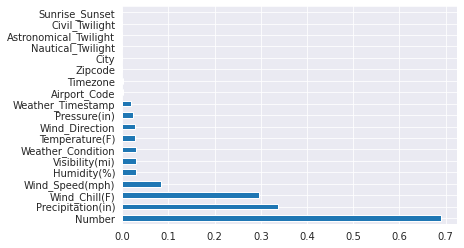

In [121]:
missing_percentages[missing_percentages!= 0].plot(kind='barh')

 Remove columns that you don't want to use.

## Exploratory Analysis & Visualisation

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

In [122]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [123]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
1516059      Riverside
1516060      San Diego
1516061         Orange
1516062    Culver City
1516063       Highland
Name: City, Length: 1516064, dtype: object

In [124]:
cities = df.City.unique()
len(cities)

10658

In [125]:
Cities_by_accidents=df.City.value_counts()
Cities_by_accidents

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
                ...  
De Borgia           1
South Dayton        1
Stockdale           1
Port Gibson         1
Killdeer            1
Name: City, Length: 10657, dtype: int64

In [126]:
Cities_by_accidents[ :20 ]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

In [127]:
type(Cities_by_accidents)

pandas.core.series.Series

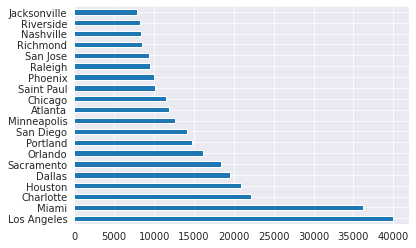

In [128]:
Cities_by_accidents[:20].plot( kind = 'barh')

In [129]:
import seaborn as sns
sns.set_style("darkgrid")

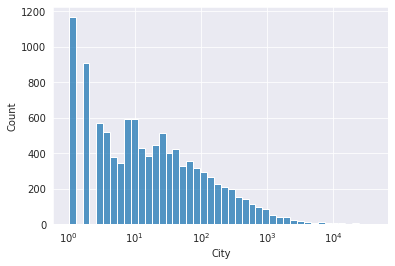

In [130]:
sns.histplot(Cities_by_accidents, log_scale= True)

In [131]:
Cities_by_accidents[Cities_by_accidents == 1]

Highgate Center    1
East Hampstead     1
Marble Hill        1
Lamoni             1
Manzanita          1
                  ..
De Borgia          1
South Dayton       1
Stockdale          1
Port Gibson        1
Killdeer           1
Name: City, Length: 1167, dtype: int64

### Start Time

In [132]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [133]:
df.Start_Time= pd.to_datetime(df.Start_Time)

In [134]:
df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           6
           ..
1516059    18
1516060    19
1516061    19
1516062    19
1516063    18
Name: Start_Time, Length: 1516064, dtype: int64

 - Figure out how to show percentages

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


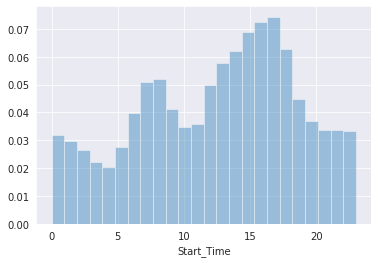

In [160]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist= True)

 - A high percentage of accidents occur between 3pm and 5pm(Probably due to the high traffic as the people are in a hurry to return home from work)

- Next highest percentage of accidents is higher between 6am and 9am (May be due to the high traffic as people are commuting to work)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


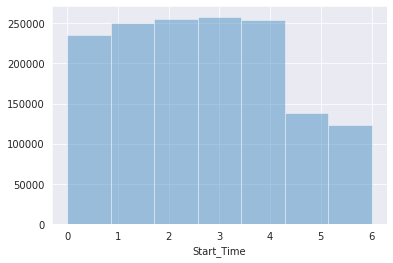

In [142]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False)

Is the distribution of accidents by hours the same on weekends as weekdays

In [154]:
df.Start_Time.dt.dayofweek == 6


0          False
1          False
2          False
3          False
4          False
           ...  
1516059    False
1516060    False
1516061    False
1516062    False
1516063    False
Name: Start_Time, Length: 1516064, dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


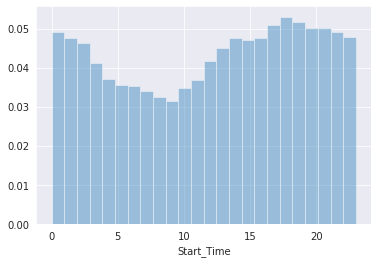

In [158]:
sundays_Start_Time =df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_Start_Time.dt.hour, bins=24, kde=False, norm_hist= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


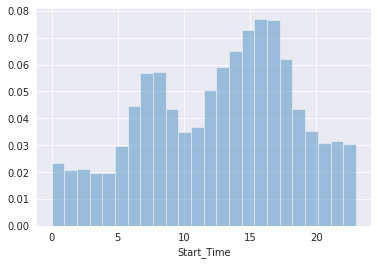

In [159]:
saturdays_Start_Time =df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(saturdays_Start_Time.dt.hour, bins=24, kde=False, norm_hist= True)

In sundays the peak occurs between 10am and 8pm unlike weekdays

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


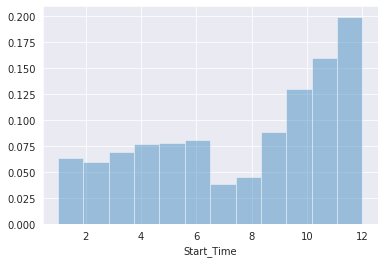

In [161]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist= True)

In [180]:
df_2019 = df[df.Start_Time.dt.year == 2016]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


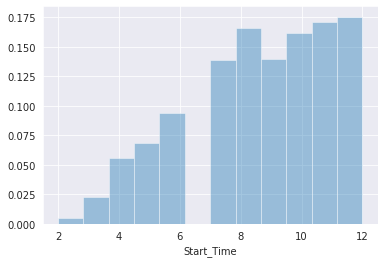

In [181]:
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist= True)

 Can you explain the month-wise trend of accidents ?
 - Much data missing for 2016. May be even for 2017

In [135]:
high_accident_cities = Cities_by_accidents[Cities_by_accidents >= 1000]
low_accident_cities = Cities_by_accidents[Cities_by_accidents < 1000]

In [136]:
len(high_accident_cities)

251

In [137]:
len(high_accident_cities)/len(cities)

0.023550384687558643

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


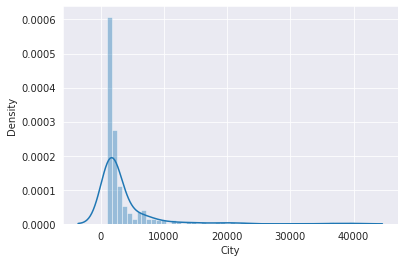

In [138]:
sns.distplot(high_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


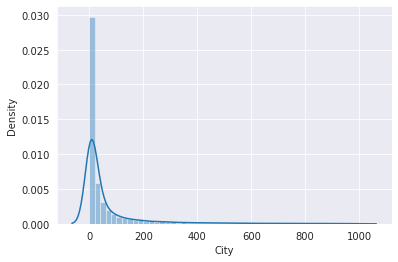

In [139]:
sns.distplot(low_accident_cities)

In [140]:
"NY" in df.State

False

## Ask & Answer Questions

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest no. of accidents? How about per capita ?
3. Does New York show up in the data? If yes, why is the count lower if this is the most populated city?
4. Among the top 100 cities in no. of accidents, which state do they belong to most frequently ?
5. What time of the day are the accidents most frequent in ?
6. Which days of the week have the most accidents ?
7. Which months have the most accidents?
8. What is the trend of accidents year over year? (decreasing/increasing)
9. When is accidents per unit of traffic is higher ?

# Summary & Conclusion 

Insights:
- No data for New York
- The no. of accidents per city decreases exponentially
- Less than 2.5% cities have more than 1000 accidents yearly
- Over 1100 cities have reported just 1 accident(need to investigate)